## Analysis Of Variance (ANOVA)

To select samples and/or reject samples we use Hypothesis and Anova

# F-test

F = variation between the sample means/variation within the sample means 

# ONE WAY ANOVA:

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
data=pd.read_csv(r'C:\Users\SS\Desktop\PlantGrowth.csv')
data.head(20)

Unnamed: 0  weight group
0            1    4.17  ctrl
1            2    5.58  ctrl
2            3    5.18  ctrl
3            4    6.11  ctrl
4            5    4.50  ctrl
5            6    4.61  ctrl
6            7    5.17  ctrl
7            8    4.53  ctrl
8            9    5.33  ctrl
9           10    5.14  ctrl
10          11    4.81  trt1
11          12    4.17  trt1
12          13    4.41  trt1
13          14    3.59  trt1
14          15    5.87  trt1
15          16    3.83  trt1
16          17    6.03  trt1
17          18    4.89  trt1
18          19    4.32  trt1
19          20    4.69  trt1

In [14]:
data.shape

(30, 3)

{'ctrl': 0    4.17
 1    5.58
 2    5.18
 3    6.11
 4    4.50
 5    4.61
 6    5.17
 7    4.53
 8    5.33
 9    5.14
 Name: weight, dtype: float64, 'trt1': 10    4.81
 11    4.17
 12    4.41
 13    3.59
 14    5.87
 15    3.83
 16    6.03
 17    4.89
 18    4.32
 19    4.69
 Name: weight, dtype: float64, 'trt2': 20    6.31
 21    5.12
 22    5.54
 23    5.50
 24    5.37
 25    5.29
 26    4.92
 27    6.15
 28    5.80
 29    5.26
 Name: weight, dtype: float64}

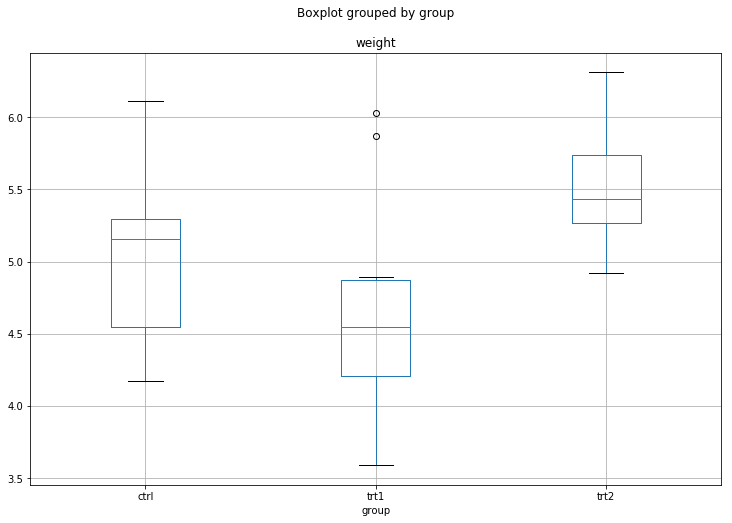

In [22]:
data.boxplot('weight',by='group',figsize=(12,8))
grps=pd.unique(data.group.values) 
d_data={grp:data['weight'][data.group==grp]for grp in grps}
d_data

In [34]:
from scipy import stats
F,p=stats.f_oneway(d_data['ctrl'],d_data['trt1'],d_data['trt2'])
print("F Value is:" ,F)
print("p Value is:" ,p)

F Value is: 4.846087862380136
p Value is: 0.0159099583256229


Low p value indicates strong evidence against null hypothesis.

In [35]:
data=pd.read_csv(r'C:\Users\SS\Desktop\ToothGrowth.csv')
data.head(20)

Unnamed: 0   len supp  dose
0            1   4.2   VC   0.5
1            2  11.5   VC   0.5
2            3   7.3   VC   0.5
3            4   5.8   VC   0.5
4            5   6.4   VC   0.5
5            6  10.0   VC   0.5
6            7  11.2   VC   0.5
7            8  11.2   VC   0.5
8            9   5.2   VC   0.5
9           10   7.0   VC   0.5
10          11  16.5   VC   1.0
11          12  16.5   VC   1.0
12          13  15.2   VC   1.0
13          14  17.3   VC   1.0
14          15  22.5   VC   1.0
15          16  17.3   VC   1.0
16          17  13.6   VC   1.0
17          18  14.5   VC   1.0
18          19  18.8   VC   1.0
19          20  15.5   VC   1.0

In [33]:
data.shape

(60, 4)

This is two-way ANOVA

# Degrees of Freedom (df) = how many values involved in the calculation has freedom to vary.

In [ ]:
N=len(data.len)
df_a=len(data.supp.unique())-1
df_b=len(data.dose.unique())-1
df_axb=df_a*df_b
df_w=N-len(data.supp.unique()*len(data.dose.unique())

## Sum Of Squares

In [ ]:
grand_mean=data['len'].mean()
ssq_a=sum([(data[data.supp=l].len.mean()-grand_mean)**2 for l in data.supp])
ssq_b=sum([(data[data.dose==l].len.mean()_grand_mean)**2 for l in data.dose])
vc=data[data.supp=='VC']
oj=data[data.supp=='OJ']
vc_dose_means=[vc[vc.dose==d].len.mean()for d in vc.dose]
oj_dose_means=[oj[oj.dose==d].len.mean()for d in oj.dose]

## Mean Of Squares

In [ ]:
ms_a=ssq_a/df_a
ms_b=ssq_b/df_b
ms_axb=ssq_axb/df_axb
ms_w=ssq_w/df_w

## F-RATIO

In [ ]:
f_a=ms_a/ms_w
f_b=ms_b/ms_w
f_axb=ms_axb/ms_w

## Obtaining p-values

In [ ]:
p_a=stats.f.sf(f_a,df_a,df_w)
p_b=stats.f.sf(f_b.df_b,df_w)
p_axb=stats.f.sf(f_axb,df_axb,df_w)